<a href="https://colab.research.google.com/github/lakshmanprabhu219/Deep-Learning/blob/master/Copy_of_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_dir="/content/drive/My Drive/Tensorflow/Practice/Pneumonia/chest_xray/train"
validation_dir="/content/drive/My Drive/Tensorflow/Practice/Pneumonia/chest_xray/test"
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255,rotation_range=0.2,zoom_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,fill_mode='nearest')

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(1000,1000),batch_size=50,class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(1000,1000),batch_size=2,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(1000,1000,3)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPooling2D(4,4),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dropout(0.35),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 998, 998, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 499, 499, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 497, 497, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 248, 248, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 246, 246, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def On_Epoch_End(self,epoch,logs={}):
    if(logs.get('acc')>0.97):
      print("Accuracy greater than required!!!!! Stopping training")
      self.stop_training=True
myCallback=MyCallback()

In [ ]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,validation_steps=8,callbacks=[myCallback])

Epoch 1/15
105/105 [==============================] - 2528s 24s/step - loss: 0.4243 - acc: 0.7922 - val_loss: 0.3062 - val_acc: 0.6875
Epoch 2/15
105/105 [==============================] - 1010s 10s/step - loss: 0.3339 - acc: 0.8368 - val_loss: 0.4390 - val_acc: 0.8125
Epoch 3/15
105/105 [==============================] - 1007s 10s/step - loss: 0.2695 - acc: 0.8819 - val_loss: 0.2312 - val_acc: 0.8750
Epoch 4/15
105/105 [==============================] - 1009s 10s/step - loss: 0.2246 - acc: 0.9064 - val_loss: 0.6212 - val_acc: 0.8125
Epoch 5/15
105/105 [==============================] - 1005s 10s/step - loss: 0.2045 - acc: 0.9133 - val_loss: 0.1882 - val_acc: 0.9375
Epoch 6/15
105/105 [==============================] - 1010s 10s/step - loss: 0.1994 - acc: 0.9097 - val_loss: 0.5237 - val_acc: 0.7500
Epoch 7/15
105/105 [==============================] - 1009s 10s/step - loss: 0.2029 - acc: 0.9168 - val_loss: 0.3819 - val_acc: 0.7500
Epoch 8/15
105/105 [==============================] - 1

In [ ]:
model.save("/content/drive/My Drive/Tensorflow/Practice/Models/Pneumonia")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Tensorflow/Practice/Models/Pneumonia/assets


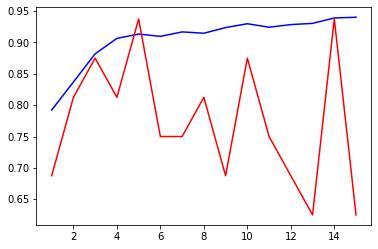

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
acc=history.history.get('acc')
epoch=[i for i in range(1,16)]
val_acc=history.history.get('val_acc')
plt.plot(epoch,acc,color='blue')
plt.plot(epoch,val_acc,color='red')
plt.show()

In [ ]:
from PIL import Image
from google.colab import files
import numpy
im=Image.open("/content/drive/My Drive/Tensorflow/Practice/Pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg")
im=im.resize((1000,1000))
im=im.convert('RGB')
a=numpy.asarray(im)/255
a=a.reshape((1,1000,1000,3))
print(a.shape)


(1, 1000, 1000, 3)


In [ ]:
predictions=model.predict(a)
print(predictions)

[[0.4195613]]


In [ ]:
test_dir="/content/drive/My Drive/Tensorflow/Practice/Pneumonia/chest_xray/val"
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(1000,1000),batch_size=1,class_mode='binary')


Found 16 images belonging to 2 classes.


In [ ]:
eval=model.evaluate(test_generator)

16/16 [==============================] - 0s 27ms/step - loss: 0.2829 - acc: 0.9375
